In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sn

In [2]:
xls = pd.ExcelFile('EastWestAirlines.xlsx')
air = pd.read_excel(xls,'data',sep=';')
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
air.shape

(3999, 12)

In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(air.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


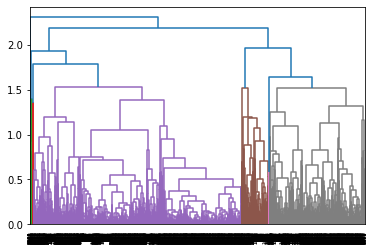

In [6]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [7]:
air.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [49]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [50]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [51]:
df_norm['h_clusterid'] =pd.Series(y_hc)
air['h_clusterid']=pd.Series(y_hc)

In [52]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [53]:
air['h_clusterid'].value_counts()

0    2692
1     499
2     457
3     297
4      54
Name: h_clusterid, dtype: int64

# ON THIS LARGER DATASET HIERARCHICAL CLUSTERING CANNOT BE PERFORMED WELL BECAUSE IT IS SUITABLE FOR ONLY SMALLER DATASETS !

In [12]:
xls = pd.ExcelFile('EastWestAirlines.xlsx')
air1 = pd.read_excel(xls,'data',sep=';')
air1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_air_df = scaler.fit_transform(air1.iloc[:,1:])

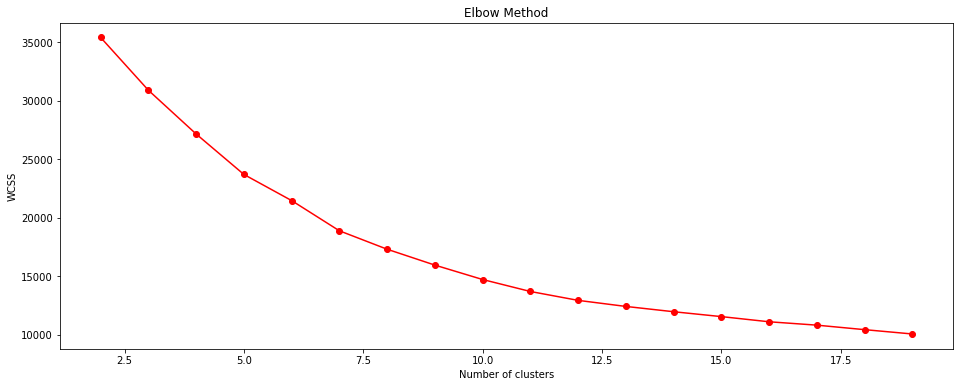

In [28]:
wcss = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_air_df)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(16,6))
plt.plot(range(2,20), wcss,'ro-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# lets take 5 clusters

In [32]:
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_air_df)

KMeans(n_clusters=5, random_state=42)

In [31]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [33]:
air1['clusterid_new'] = clusters_new.labels_

In [34]:
clusters_new.cluster_centers_

array([[ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.38731797],
       [-0.29641347, -0.13161852, -0.60545267,  0.03310233, -0.06073946,
        -0.51388906, -0.48405597, -0.18598589, -0.19793836, -0.19954907,
        -0.34898218],
       [ 0.43345067, -0.10930103,  1.20069627, -0.08197221, -0.05456398,
         0.92158358,  0.75174941, -0.08098204, -0.08963711,  0.37272235,
         0.57771575],
       [ 1.15767247,  0.4067135 ,  0.1198295 ,  0.17823194, -0.06276658,
         0.6527732 ,  1.73175761,  3.73260009,  3.99457475,  0.26854986,
         0.8953856 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [35]:
air1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
1,1,2236.817102,43570.894299,42.315519,1.226049,1.019398,1.000396,4737.252573,6.955661,199.646081,0.622328,3705.155582,0.201504
2,2,1598.558400,117547.505600,59.515200,3.710400,1.002400,1.001600,39367.885600,18.807200,346.607200,1.034400,4889.987200,0.649600
3,3,1757.802721,190251.952381,458.734694,2.224490,1.040816,1.000000,32907.979592,28.231293,5685.823129,16.523810,4673.081633,0.802721
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [36]:
air1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


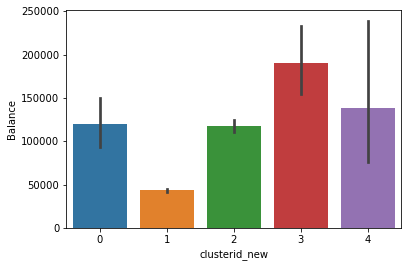

In [37]:
sn.barplot(data=air1,x='clusterid_new',y='Balance')

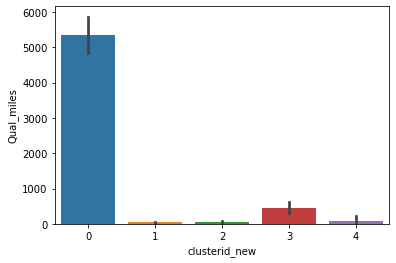

In [42]:
sn.barplot(data=air1,x='clusterid_new',y='Qual_miles')

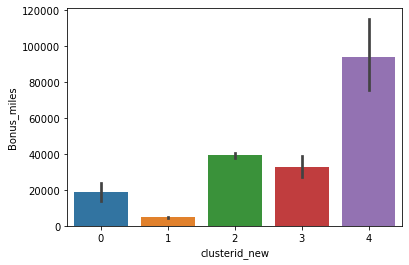

In [44]:
sn.barplot(data=air1,x='clusterid_new',y='Bonus_miles')

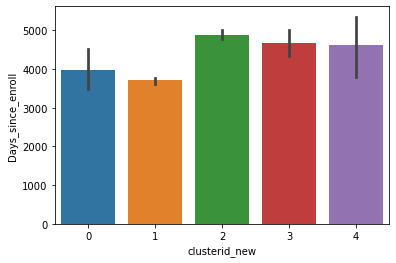

In [46]:
sn.barplot(data=air1,x='clusterid_new',y='Days_since_enroll')

In [47]:
air1['clusterid_new'].value_counts()

1    2526
2    1250
3     147
0      61
4      15
Name: clusterid_new, dtype: int64

# we done both clustering on this dataset
# Lets take 1,2and 3 clusters from this cluster 1 is non frequent customers Has highest number of observations,cluster 2 is frequent customers,cluster 3 is medium frequent customers